# Finger 1

In [17]:
%matplotlib inline

from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # haciendo los graficos un poco mas bonitos xD
plt.rcParams['figure.figsize'] = (15, 5)

In [18]:
DATA_PATH = 'datos_navent_fiuba/'
postulantes_educacion = pd.read_csv('./datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
postulantes_educacion.head()

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [19]:
postulantes_genero_y_edad = pd.read_csv('./datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
postulantes_genero_y_edad.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [20]:
postulantes = pd.merge(postulantes_educacion, postulantes_genero_y_edad, on='idpostulante')
postulantes.head()

,idpostulante,nombre,estado,fechanacimiento,sexo
0,NdJl,Posgrado,En Curso,1969-05-09,MASC
1,NdJl,Universitario,Graduado,1969-05-09,MASC
2,8BkL,Universitario,En Curso,1976-07-21,FEM
3,8BkL,Universitario,Graduado,1976-07-21,FEM
4,8BkL,Posgrado,Graduado,1976-07-21,FEM


In [21]:
postulaciones = pd.read_csv('./datos_navent_fiuba/fiuba_4_postulaciones.csv')
#postulaciones.head()
postulaciones['fechapostulacion'] = pd.to_datetime(postulaciones['fechapostulacion'])
postulaciones.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
dtype: object

In [22]:
#postulaciones.sample(500000).groupby('fechapostulacion').mean().plot(kind='bar',figsize=(16,8), title='Postulaciones');
postulaciones['aniopostulacion'] = postulaciones['fechapostulacion'].dt.year
postulaciones['mespostulacion'] = postulaciones['fechapostulacion'].dt.month
postulaciones['diasemanapostulacion'] = postulaciones['fechapostulacion'].dt.weekday_name
postulaciones['diapostulacion'] = postulaciones['fechapostulacion'].dt.date

postulaciones.groupby('diasemanapostulacion').count()

,idaviso,idpostulante,fechapostulacion,aniopostulacion,mespostulacion,diapostulacion
diasemanapostulacion,,,,,,
Friday,446698,446698,446698,446698,446698,446698
Monday,668310,668310,668310,668310,668310,668310
Saturday,217331,217331,217331,217331,217331,217331
Sunday,226857,226857,226857,226857,226857,226857
Thursday,506163,506163,506163,506163,506163,506163
Tuesday,658428,658428,658428,658428,658428,658428
Wednesday,677836,677836,677836,677836,677836,677836


Text(0.5,1,'Cantidad de postulaciones por dia')

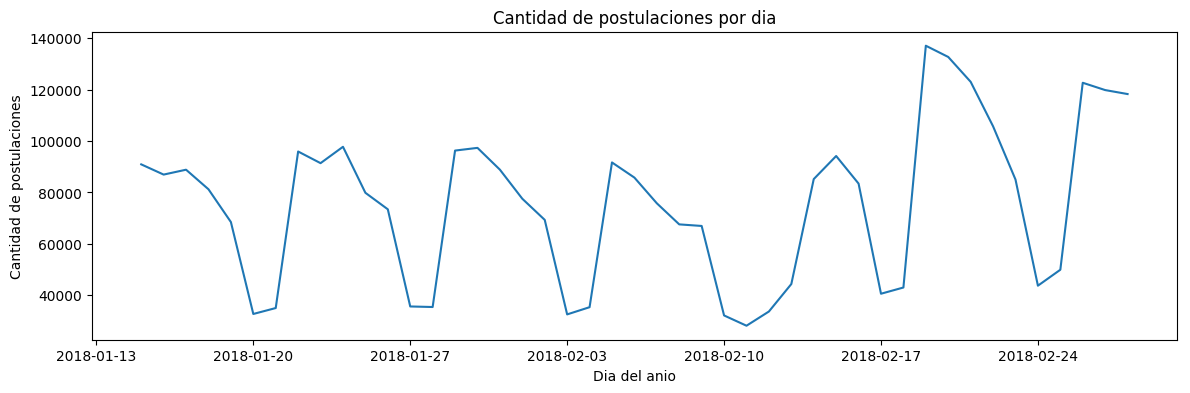

In [23]:
postulaciones.groupby('diapostulacion').count()['idpostulante'].plot(figsize=(14,4));
ax=plt.gca()
ax.set_ylabel('Cantidad de postulaciones')
ax.set_xlabel('Dia del anio');
ax.set_title('Cantidad de postulaciones por dia')

Text(0.5,1,'Cantidad de postulaciones por dia')

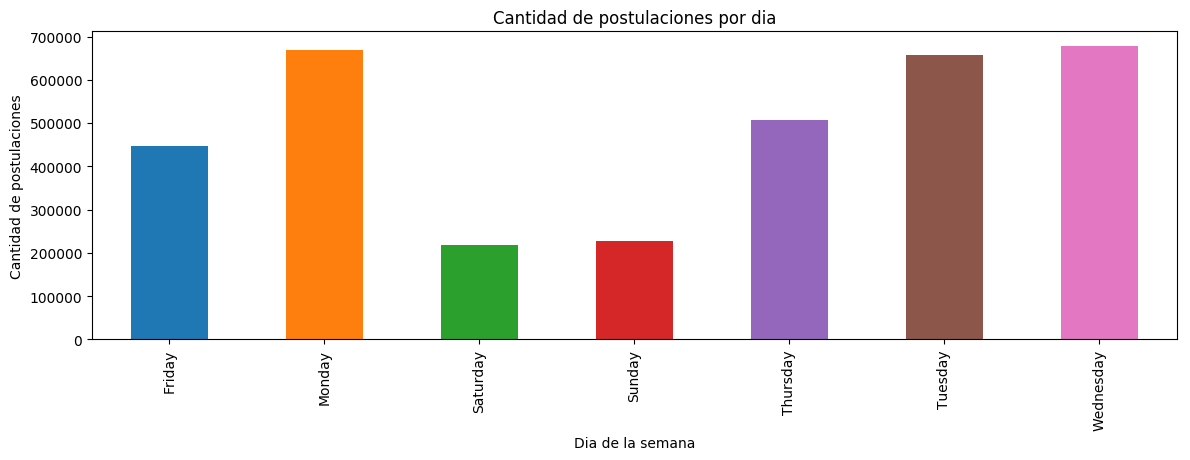

In [25]:

postulaciones.groupby('diasemanapostulacion').count()['idpostulante'].plot(kind='bar', figsize=(14,4));
ax=plt.gca();
ax.set_ylabel('Cantidad de postulaciones');
ax.set_xlabel('Dia de la semana');
ax.set_title('Cantidad de postulaciones por dia');

In [30]:
postulaciones.groupby('diasemanapostulacion').mean()

,idaviso,aniopostulacion,mespostulacion
diasemanapostulacion,,,
Friday,1.111383e+09,2018.0,1.682257
Monday,1.111469e+09,2018.0,1.576291
Saturday,1.111316e+09,2018.0,1.685530
Sunday,1.111332e+09,2018.0,1.689509
Thursday,1.111418e+09,2018.0,1.681707
Tuesday,1.111489e+09,2018.0,1.581263
Wednesday,1.111451e+09,2018.0,1.593564
